In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno.missingno as msno
from datetime import datetime
import seaborn as sns

In [2]:
df = pd.read_csv('marketing_campaign.csv')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

### Find missing values

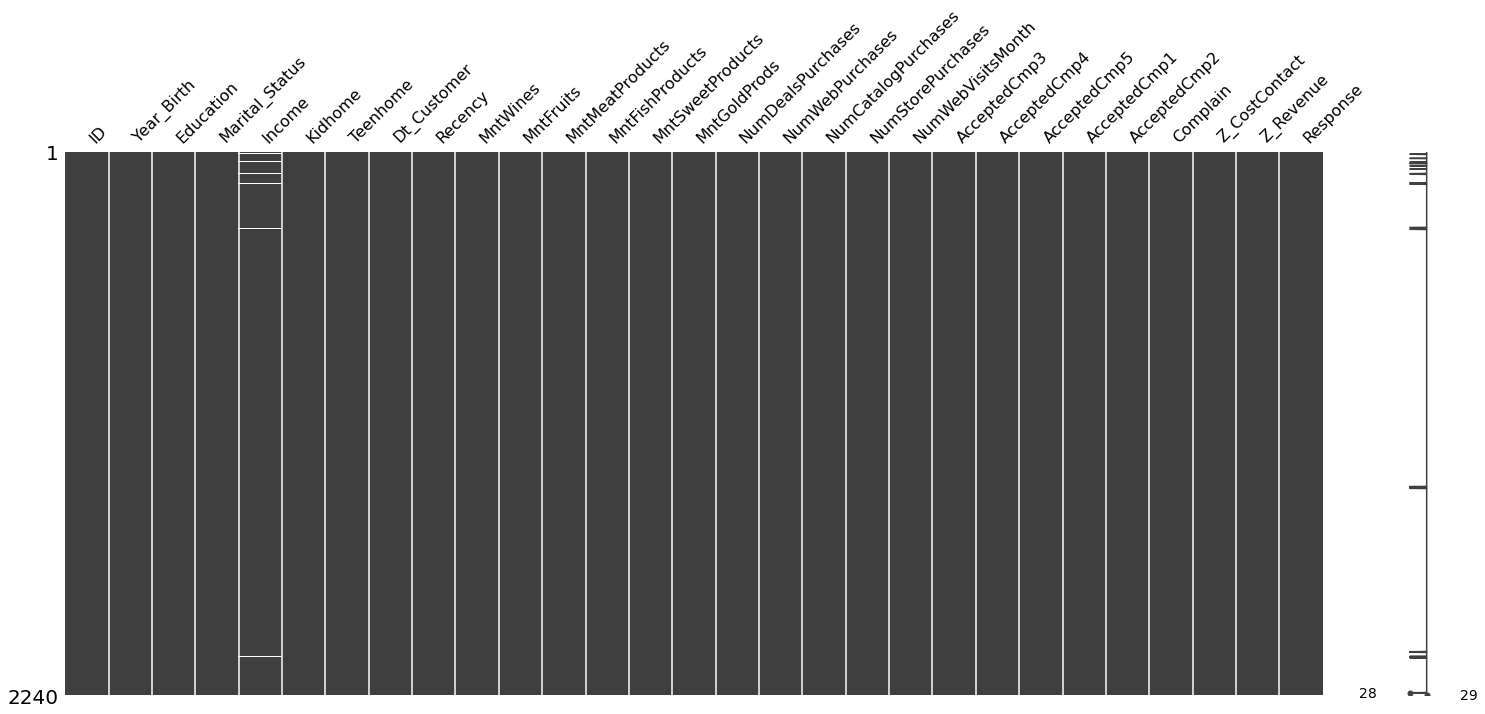

In [4]:
msno.matrix(df)
plt.show()

In [5]:
df[df.isna().any(axis=1)].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0


Delete the rows with missing values

In [6]:
df.dropna(axis=0, inplace=True)

### Calculate the customers' age

In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
df['Age'] = datetime.now().year - df.Year_Birth

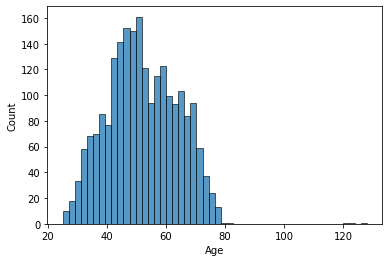

In [9]:
sns.histplot(x="Age", data=df, bins=50)
plt.show()

Filter out outliers in age.

In [10]:
df['Age'] = df[df['Age'] <= 90]['Age']

Check for missing values

In [11]:
df[df.isna().any(axis=1)].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,0,0,0,0,0,1,3,11,0,NaN
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,0,0,0,0,0,0,3,11,0,NaN
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,0,0,1,0,0,0,3,11,0,NaN


In [12]:
df.dropna(axis=0, inplace=True)

### Clean up Education column

In [13]:
df.Education.value_counts()

Graduation    1116
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [14]:
def edu(x):
    education = {
        'Basic'     :'Undergraduate',
        '2n Cycle'  :'Undergraduate',
        'Graduation':'Postgraduate',
        'Master'    :'Postgraduate',
        'PhD'       :'Postgraduate'
    }
    return education[x]

In [15]:
df['Simplified_Education'] = df.Education.apply(edu)

In [16]:
df[['Education', 'Simplified_Education']].head()

,Education,Simplified_Education
0,Graduation,Postgraduate
1,Graduation,Postgraduate
2,Graduation,Postgraduate
3,Graduation,Postgraduate
4,PhD,Postgraduate


### Clean up Marital Status column

In [17]:
df.Marital_Status.value_counts()

Married     857
Together    572
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [18]:
df[df['Marital_Status'] == 'YOLO']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Simplified_Education
2177,492,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,...,0,0,0,0,0,3,11,0,48.0,Postgraduate
2202,11133,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,...,0,0,0,0,0,3,11,1,48.0,Postgraduate


In [19]:
df[df['Marital_Status'] == 'Absurd']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Simplified_Education
2093,7734,1993,Graduation,Absurd,79244.0,0,0,19-12-2012,58,471,...,0,1,1,0,0,3,11,1,28.0,Postgraduate
2134,4369,1957,Master,Absurd,65487.0,0,0,10-01-2014,48,240,...,0,0,0,0,0,3,11,0,64.0,Postgraduate


Dropping the "YOLO" and "Absurd" marital status because we are not sure if that means "Single" or "In a relationship". We do not want to make assumptions that may be incorrect.

In [20]:
df = df[df.Marital_Status != 'YOLO']
df = df[df.Marital_Status != 'Absurd']

In [21]:
df.Marital_Status.value_counts()

Married     857
Together    572
Single      470
Divorced    231
Widow        76
Alone         3
Name: Marital_Status, dtype: int64

In [22]:
def married_single(x):
    relationship = {
        'Married' :'In couple',
        'Together':'In couple',
        'Single'  :'Alone',
        'Divorced':'Alone',
        'Widow'   :'Alone',
        'Alone'   :'Alone'
    }
    
    return relationship[x]

In [23]:
df['Relationship_Status'] = df.Marital_Status.apply(married_single)

In [24]:
df[['Marital_Status', 'Relationship_Status']]

,Marital_Status,Relationship_Status
0,Single,Alone
1,Single,Alone
2,Together,In couple
3,Together,In couple
4,Married,In couple
...,...,...
2235,Married,In couple
2236,Together,In couple
2237,Divorced,Alone
2238,Together,In couple


### Clean up the children column
We will calculate how many children are in each household and create a new column containing boolean data on whether or not the household has a child.

In [25]:
# Total number of children
df['Num_children'] = df.Kidhome + df.Teenhome

# Has a child (True/False)
df['Has_child'] = df['Num_children'].apply(lambda x: x != 0)

In [26]:
df[['Has_child', 'Num_children']]

,Has_child,Num_children
0,False,0
1,True,2
2,False,0
3,True,1
4,True,1
...,...,...
2235,True,1
2236,True,3
2237,False,0
2238,True,1


### Rename the products columns
We will rename the products columns to something simpler and easier to understand for our analysis. Then we will add the total amount of products purchased.

In [27]:
df = df.rename(columns={
    'MntWines'        :'Wines',
    'MntFruits'       :'Fruits',
    'MntMeatProducts' :'Meat',
    'MntFishProducts' :'Fish',
    'MntSweetProducts':'Sweets',
    'MntGoldProds'    :'Gold'
})


In [28]:
df.iloc[:,9:15]

,Wines,Fruits,Meat,Fish,Sweets,Gold
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


In [29]:
df['Total'] = df.iloc[:,9:15].sum(axis=1)

In [30]:
df.iloc[:,20:25]

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
2235,0,0,0,0,0
2236,0,0,0,1,0
2237,0,1,0,0,0
2238,0,0,0,0,0


### Remove outliers from Income column

In [31]:
df.Income.describe()

count      2209.000000
mean      52221.801720
std       25193.001847
min        1730.000000
25%       35196.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

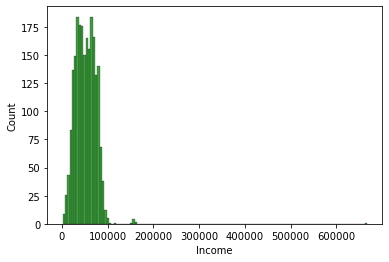

In [32]:
sns.histplot(x="Income", data=df, color='green')

plt.show()

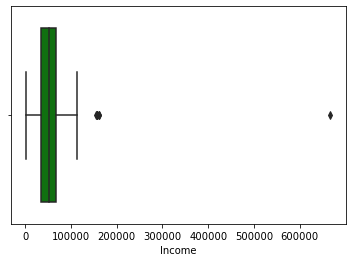

In [33]:
sns.boxplot(x="Income", data=df, color='green')

plt.show()

In [34]:
df[df['Income'] >= 150000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Simplified_Education,Relationship_Status,Num_children,Has_child,Total
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,0,3,11,0,48.0,Postgraduate,In couple,1,True,1608
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,...,0,3,11,0,45.0,Postgraduate,In couple,2,True,107
655,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,...,0,3,11,0,46.0,Postgraduate,Alone,0,False,6
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,0,3,11,0,39.0,Postgraduate,In couple,0,False,1717
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,...,0,3,11,0,50.0,Postgraduate,In couple,1,True,59
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,...,0,3,11,0,44.0,Postgraduate,In couple,0,False,1730
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,...,0,3,11,0,72.0,Postgraduate,In couple,0,False,8
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,0,3,11,0,44.0,Postgraduate,In couple,1,True,62


In [35]:
df = df[df['Income'] <= 150000]

In [36]:
df.Income.describe()

count      2201.000000
mean      51606.144480
std       20721.181896
min        1730.000000
25%       35178.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

### Calculate the seniority of each customer

In [37]:
# Convert string to datetime object
df['Dt_Customer'] = df['Dt_Customer'].map(lambda x: datetime.strptime(x, '%d-%m-%Y').date())

In [38]:
# Calculate the number of days since customers joined
df['days_joined'] = datetime.now().date() - df.Dt_Customer
df['days_joined'] = df.days_joined.map(lambda x: x.days)

# Convert number of days to approximate years
# Approximate because it does not take into account leap years
df['years_joined'] = round(df.days_joined / 365, 3)

In [39]:
df[['Dt_Customer', 'days_joined', 'years_joined']]

,Dt_Customer,days_joined,years_joined
0,2012-09-04,3354,9.189
1,2014-03-08,2804,7.682
2,2013-08-21,3003,8.227
3,2014-02-10,2830,7.753
4,2014-01-19,2852,7.814
...,...,...,...
2235,2013-06-13,3072,8.416
2236,2014-06-10,2710,7.425
2237,2014-01-25,2846,7.797
2238,2014-01-24,2847,7.800


In [40]:
df.years_joined.describe()

count    2201.000000
mean        8.341006
std         0.554800
min         7.373000
25%         7.866000
50%         8.345000
75%         8.822000
max         9.288000
Name: years_joined, dtype: float64

# Convert data types

### Income column
Convert from float to integer

In [41]:
# Check if any value in the income column does not end with a 0
print(df.Income.shape[0] - df.Income.astype(str).str.endswith('0').sum())

0


Since all values in the Income column end with a zero, we will convert them to integers

In [42]:
df['Income'] = df.Income.astype(int)

### Age column
Convert from float to integer

In [43]:
# Check if any value in the age column does not end with a 0
print(df.Age.shape[0] - df.Age.astype(str).str.endswith('0').sum())

0


In [44]:
df['Age'] = df.Age.astype(int)

# Create new DataFrame with selected columns

In [45]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Simplified_Education', 'Relationship_Status', 'Num_children',
       'Has_child', 'Total', 'days_joined', 'years_joined'],
      dtype='object')

In [46]:
temp_df = df[['Age', 'Simplified_Education', 
              'Relationship_Status', 'Income', 
              'Num_children', 'Has_child', 
              'years_joined', 'Total']]

In [47]:
temp_df.head()

,Age,Simplified_Education,Relationship_Status,Income,Num_children,Has_child,years_joined,Total
0,64,Postgraduate,Alone,58138,0,False,9.189,1617
1,67,Postgraduate,Alone,46344,2,True,7.682,27
2,56,Postgraduate,In couple,71613,0,False,8.227,776
3,37,Postgraduate,In couple,26646,1,True,7.753,53
4,40,Postgraduate,In couple,58293,1,True,7.814,422


In [48]:
temp_df.Simplified_Education.value_counts(normalize=True)

Postgraduate     0.885507
Undergraduate    0.114493
Name: Simplified_Education, dtype: float64

In [49]:
temp_df.Relationship_Status.value_counts(normalize=True)

In couple    0.64607
Alone        0.35393
Name: Relationship_Status, dtype: float64

In [50]:
temp_df.Num_children.value_counts(normalize=True)

1    0.504316
0    0.284416
2    0.188551
3    0.022717
Name: Num_children, dtype: float64

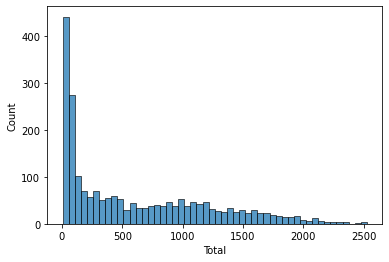

In [51]:
sns.histplot(x="Total", data=temp_df, bins=50)
plt.show()

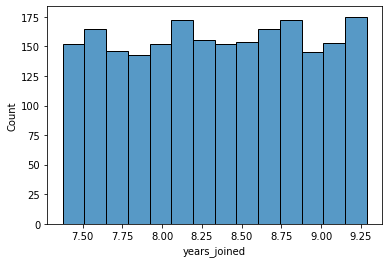

In [52]:
sns.histplot(x="years_joined", data=temp_df)
plt.show()

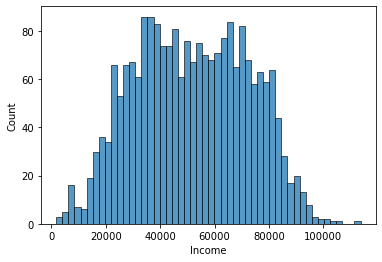

In [53]:
sns.histplot(x="Income", data=temp_df, bins=50)
plt.show()

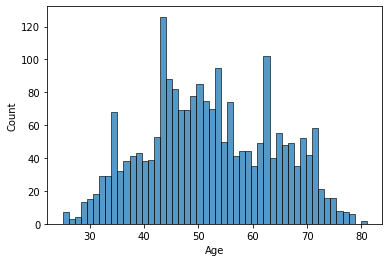

In [54]:
sns.histplot(x="Age", data=temp_df, bins=50)
plt.show()

# Save the new DataFrame as Pickle object

In [55]:
temp_df.head()

,Age,Simplified_Education,Relationship_Status,Income,Num_children,Has_child,years_joined,Total
0,64,Postgraduate,Alone,58138,0,False,9.189,1617
1,67,Postgraduate,Alone,46344,2,True,7.682,27
2,56,Postgraduate,In couple,71613,0,False,8.227,776
3,37,Postgraduate,In couple,26646,1,True,7.753,53
4,40,Postgraduate,In couple,58293,1,True,7.814,422


In [56]:
temp_df.to_pickle("./saved-items/df.pkl")